In [1]:
p = int(input("inter a prime number: "))
a = int(input("inter a namber a: "))
b = int(input("inter a number b: "))
print(f"y^2 = x^3 + {a}*x + {b} Mod({p})")

inter a prime number:  23
inter a namber a:  4
inter a number b:  4


y^2 = x^3 + 4*x + 4 Mod(23)


In [2]:
###generate the list of poits
def listPoint(a, b, p):
    list_of_point = []
    i = 0
    while i < p:
        j = 0
        while j < p:
            if (pow(j, 2, p)) == ((pow(i, 3) + a*(i%p) + b) % p):
                #print(f"({i}, {j})")
                list_of_point.append((i, j))
                #plt.scatter(i, j)
            j+=1
        i+=1
    return list_of_point

In [3]:
pointList = listPoint(a, b, p)
print(pointList, "\n", len(pointList)+1)

[(0, 2), (0, 21), (1, 3), (1, 20), (10, 3), (10, 20), (12, 3), (12, 20), (15, 9), (15, 14), (16, 1), (16, 22), (19, 4), (19, 19)] 
 15


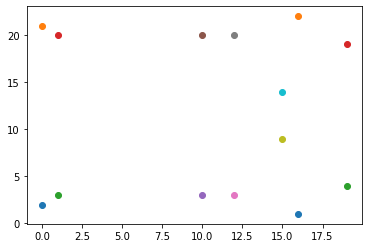

In [4]:
import matplotlib.pyplot as plt
for i in range(0, len(pointList)):
    plt.scatter(pointList[i][0], pointList[i][1])

In [6]:
###list of generator
def listGenerator(a, b, p, pointList):
    list_of_generator = []
    justList = []
    for i in range(0, len(pointList)):
        justList.clear()
        flag = True
        G = pointList[i]
        justList.append(G)
        while (justList[-1][0] != G[0]) or flag:
            flag = False
            if (justList[-1] == G) and G[1] != 0:
                s = ((3*pow(G[0], 2) + a) * pow(2*G[1], p-2, p))%p
                #print(s)
            elif (justList[-1][0] != G[0]):
                s = ((G[1] - justList[-1][1])*pow((G[0] - justList[-1][0]), p-1, p))%p
            else:
                break
            x = (pow(s, 2) - justList[-1][0] - G[0])%p
            y = (s*(justList[-1][0] - x) - justList[-1][1])%p
            justList.append((x, y))
            if len(justList) == len(pointList):
                list_of_generator.append(G)
                break
        #print(list_of_generator)
        #print(justList)
    return list_of_generator

In [7]:
def sume(a, b, p, Apoint, Bpoint):
    if Apoint == Bpoint and Apoint[1] != 0:
        s = ((3*pow(Apoint[0], 2) + a)*(pow(2*Apoint[1], p-2, p)))%p
    elif Apoint[0] != Bpoint[0]:
        s = ((Bpoint[1] - Apoint[1])*(pow((Bpoint[0] - Apoint[0]), p-2, p)))%p
    else:
        print("point at infinity")
        return
    x = (pow(s, 2)-Apoint[0] - Bpoint[0])%p
    y = (s*(Apoint[0] - x) - Apoint[1])%p
    return (x, y)

In [8]:
print(listGenerator(a, b, p, pointList))

[(12, 12), (12, 31), (13, 21), (13, 22), (29, 12), (29, 31), (32, 3), (32, 40), (34, 3), (34, 40), (35, 21), (35, 22), (42, 7), (42, 36)]


In [38]:
print(sume(a, b, p, (13, 22), (13, 21)))

point at infinity
None


In [20]:
def scalarMulNormalMethod(a, b, p, scaler, point):
    T = point
    for i in range(1, scaler):
        T = sume(a, b, p, T, point)
        if T == None:
            T=point
    return T

In [23]:
print(scalarMulNormalMethod(a, b, p, 17, (2, 50)))

(1, 24)


In [37]:
def scalarMulBinaryMethod(a, b, p, scalar, point):
    strg = format(scalar, 'b')
    T = point
    for i in range(0, len(strg)-1):
        T = sume(a, b, p, T, T)
        if strg[1+i: i+2] == '1':
            T = sume(a, b, p, T, point)
        if T == None:
            T = point
    return T

In [38]:
print(scalarMulBinaryMethod(a, b, p, 17, (2, 50)))

(1, 24)
